# 🎵 Data Science in Music: A Machine Learning Recommendation Model 🎶

## **Overview**
This notebook implements a **music recommendation system** using machine learning and data-driven techniques. 
The goal is to recommend **relevant songs** based on a user's music preferences, leveraging **data science** and **AI-powered algorithms**.

## **Key Features**
- 📊 **Data Preprocessing:** Cleans and structures music-related data.
- 🧠 **Recommendation Engine:** Uses similarity algorithms to suggest songs.
- 📈 **Visualization & Insights:** Analyzes patterns in the dataset.

## **Dataset**
The dataset contains various song attributes such as **artist names, genres, track features, and popularity metrics**.

## **Approach**
1. **Data Cleaning & Preprocessing**
2. **Feature Engineering & Similarity Calculation**
3. **Building the Recommendation Model**
4. **Exploratory Data Analysis (EDA)**

---
Let's dive into the implementation! 🚀

In [2]:
# 📌 Import necessary libraries
import os
import h5py
import pandas as pd
import numpy as np
from glob import glob
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import boto3

In [13]:
# Path to one of your HDF5 files (modify this path based on your dataset structure)
file_path = "A:\Data science\MillionSongSubset\A\A\A\TRAAAAW128F429D538.h5"

def explore_hdf5_file(file_path):
    """Load and explore an HDF5 file from the Million Song Dataset"""
    with h5py.File(file_path, "r") as h5_file:
        print("🔍 Keys in this file:", list(h5_file.keys()))  # Check available groups
        
        # Explore the metadata group
        if "metadata" in h5_file:
            metadata = h5_file["metadata"]
            print("\n🎵 Artist Name:", metadata["songs"]["artist_name"][0].decode("utf-8"))
            print("🎤 Artist ID:", metadata["songs"]["artist_id"][0].decode("utf-8"))
            print("🎼 Title:", metadata["songs"]["title"][0].decode("utf-8"))
            #print("📅 Release Year:", metadata["songs"]["year"][0])

        # Explore the analysis group
        if "analysis" in h5_file:
            analysis = h5_file["analysis"]
            print("\n🔊 Tempo:", analysis["songs"]["tempo"][0])
            print("🎶 Key:", analysis["songs"]["key"][0])
            print("📏 Duration:", analysis["songs"]["duration"][0])

        # Explore the musicbrainz group
        if "musicbrainz" in h5_file:
            musicbrainz = h5_file["musicbrainz"]
            #print("\n📀 Album Name:", musicbrainz["songs"]["release"][0].decode("utf-8"))

# Run exploration function
explore_hdf5_file(file_path)

🔍 Keys in this file: ['analysis', 'metadata', 'musicbrainz']

🎵 Artist Name: Casual
🎤 Artist ID: ARD7TVE1187B99BFB1
🎼 Title: I Didn't Mean To

🔊 Tempo: 92.198
🎶 Key: 1
📏 Duration: 218.93179


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30484\618296351.py:2: SyntaxWarning: invalid escape sequence '\D'
  file_path = "A:\Data science\MillionSongSubset\A\A\A\TRAAAAW128F429D538.h5"


In [ ]:
# Define the columns we want (optional)
selected_features = [
    "artist_name", "artist_hotttnesss", "title", "tempo", "key", "duration", "loudness"
]

def extract_features(file_path):
    """Extract selected features from a single HDF5 file."""
    with h5py.File(file_path, "r") as f:
        metadata = f["metadata"]["songs"]
        analysis = f["analysis"]["songs"]

        data = {}
        for col in selected_features:
            if col in metadata.dtype.names:
                value = metadata[col][0]
            elif col in analysis.dtype.names:
                value = analysis[col][0]
            else:
                value = None  # If the column does not exist

            # Handle different data types
            if isinstance(value, np.bytes_):  # If byte string, decode
                data[col] = value.decode("utf-8") if value else "Unknown"
            elif isinstance(value, (int, float, np.integer, np.floating)):  # Numeric
                data[col] = float(value)
            else:
                data[col] = "Unknown"  # Default for missing values

        # Handle artist terms separately (since it's a list)
        if "artist_terms" in metadata.dtype.names:
            artist_terms = metadata["artist_terms"][0]
            data["artist_terms"] = [x.decode('utf-8') if isinstance(x, bytes) else x for x in artist_terms]
        else:
            data["artist_terms"] = []

    return data

# Example: Load a single file
file_path = "A:/Data science/MillionSongSubset/A/A/A/TRAAAAW128F429D538.h5"
df_song = extract_features(file_path)

# Convert to DataFrame
df_sample = pd.DataFrame([df_song])
df_sample.head()


,artist_name,artist_hotttnesss,title,tempo,key,duration,loudness,artist_terms
0,Casual,0.401998,I Didn't Mean To,92.198,1.0,218.93179,-11.197,[]


In [ ]:
# Base directory where all HDF5 files are stored
base_dir = "A:/Data science/MillionSongSubset"

# Find all HDF5 files recursively
all_files = glob(os.path.join(base_dir, "**/*.h5"), recursive=True)

# Process all files and store them in a DataFrame
data_list = []
for file in all_files:
    try:
        song_data = extract_features(file)
        data_list.append(song_data)
    except Exception as e:
        print(f"Error processing {file}: {e}")

# Convert collected data into a single DataFrame
df_msd = pd.DataFrame(data_list)

# Save to CSV for future use
df_msd.to_csv("million_song_dataset.csv", index=False)

In [ ]:
# Apply StnadardScaler
test_df = df_msd.copy()
scaler = StandardScaler()
test_df[features] = scaler.fit_transform(test_df[features])

In [ ]:
# Normalize numerical Data
# Select only numerical features for clustering
features = ["tempo", "key", "duration", "loudness", "artist_hotttnesss"]

# Apply StnadardScaler
test_df = df_msd.copy()
scaler = StandardScaler()
test_df[features] = scaler.fit_transform(test_df[features])

In [19]:
# 🏋️ Train the Recommendation Model
# Train the K-Means Model
kmeans = KMeans(n_clusters=5, random_state=42)
test_df["cluster"] = kmeans.fit_predict(test_df[features])

test_df[["title", "artist_name", "cluster"]]

,title,artist_name,cluster
0,I Didn't Mean To,Casual,1
1,Soul Deep,The Box Tops,4
2,Amor De Cabaret,Sonora Santanera,4
3,Something Girls,Adam Ant,1
4,Face the Ashes,Gob,1
...,...,...,...
9995,The Hanged Man,Moonspell,4
9996,The Wonderful World Of The Young,Danny Williams,0
9997,Sentimental Man,Winston Reedy,1
9998,Zydeco In D-Minor,"Myrick ""Freeze"" Guillory",1


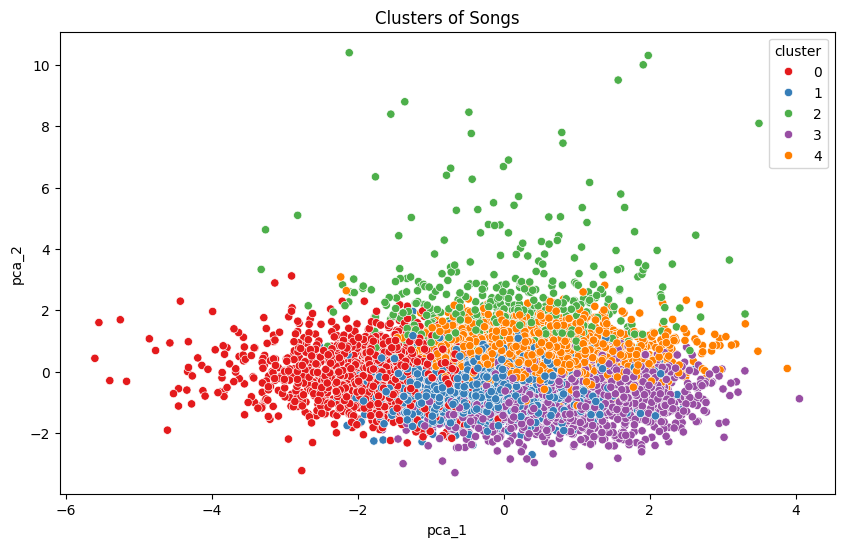

In [20]:
# Reduce data to 2D using PCA
pca = PCA(n_components=2)
test_df["pca_1"], test_df["pca_2"] = pca.fit_transform(test_df[features])[:, 0], pca.fit_transform(test_df[features])[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_df["pca_1"], y=test_df["pca_2"], hue=test_df["cluster"], palette="Set1")
plt.title("Clusters of Songs")
plt.show()

In [21]:
# 📥 Load the dataset
# Ensuring the DF is ready to save as csv for uploading in supabase
test_df.insert(0, "ID", range(0, len(test_df)))

DB = pd.DataFrame()

DB["track_id"] = test_df["ID"].astype(str) # Primary Key
DB["artist_name"] = test_df["artist_name"].astype(str)
DB["track_name"] = test_df["title"].astype(str)   
DB["cluster_id"] = test_df["cluster"].astype(str)

# Save proper dataset for Supabase upload
DB.to_csv("MSD_clustered.csv", index=False)

In [ ]:
# 🎯 Generate Music Recommendations
# Test recommendation

# Function to find recommended artists
def recommend_artists(artist_name):
    # Check if artist exists
    if artist_name not in DB["artist_name"].values:
        return f"❌ Artist '{artist_name}' not found in the dataset."
    
    # Get the cluster of the given artist
    artist_cluster = DB[DB["artist_name"] == artist_name]["cluster_id"].iloc[0]

    # Find other artists in the same cluster
    recommended_artists = DB[DB["cluster_id"] == artist_cluster]["artist_name"].unique()

    # Remove the input artist from recommendations
    recommended_artists = [artist for artist in recommended_artists if artist != artist_name]

    return {
        "input_artist": artist_name,
        "cluster_id": int(artist_cluster),
        "recommended_artists": recommended_artists[:5]  # Show max 10 recommendations
    }

# Test the function
artist_input = input("Enter an artist name: ").strip()
result = recommend_artists(artist_input)
print(result)

{'input_artist': 'Eminem', 'cluster_id': 1, 'recommended_artists': ['Casual', 'Adam Ant', 'Gob', 'Tweeterfriendly Music', 'Lionel Richie']}


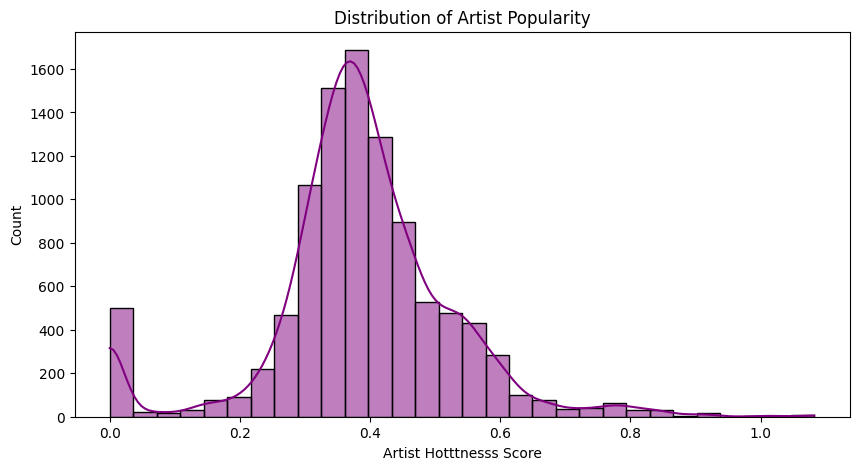

In [28]:
# Histogram of artist hotness
plt.figure(figsize=(10, 5))
sns.histplot(df_msd['artist_hotttnesss'], bins=30, kde=True, color="purple")
plt.title("Distribution of Artist Popularity")
plt.xlabel("Artist Hotttnesss Score")
plt.ylabel("Count")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30484\3347214049.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.index, y=top_artists.values, palette="magma")


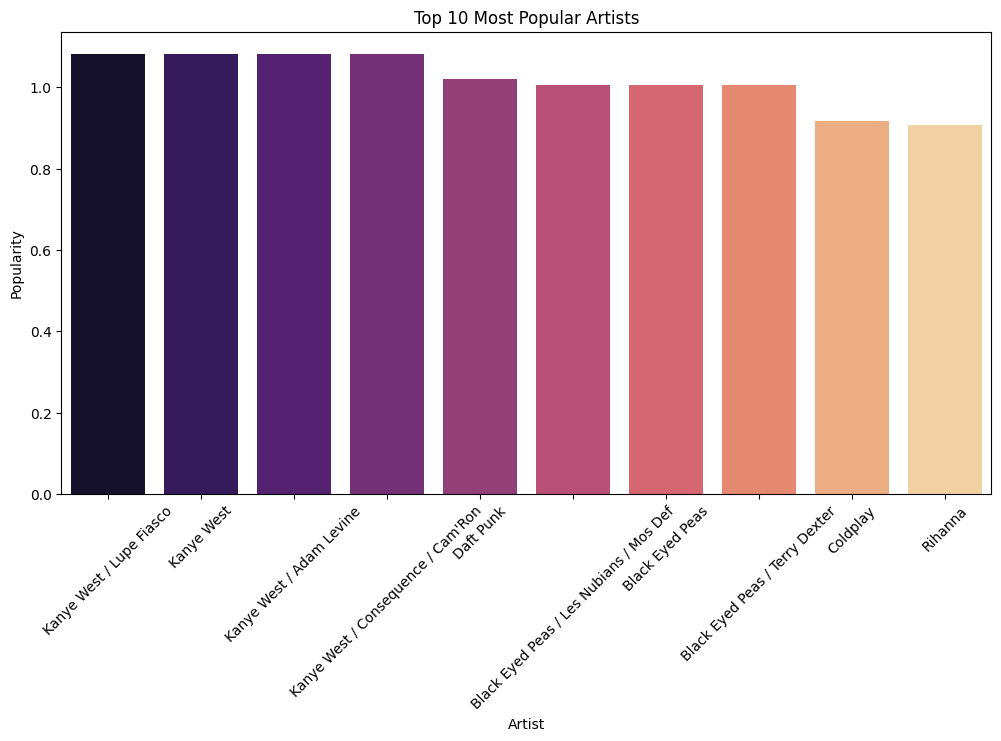

In [70]:
# Top 10 artists by popularity
top_artists = df_msd.groupby("artist_name")["artist_hotttnesss"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

sns.barplot(x=top_artists.index, y=top_artists.values, palette="magma")

plt.title("Top 10 Most Popular Artists")
plt.xticks(rotation=45)
plt.xlabel("Artist")
plt.ylabel("Popularity")

plt.show()

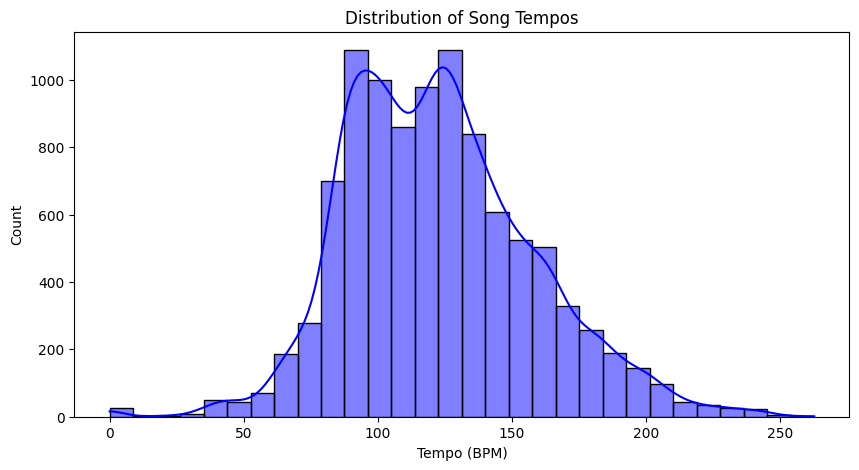

In [69]:
# Histogram of song tempos
plt.figure(figsize=(10, 5))

sns.histplot(df_msd['tempo'], bins=30, kde=True, color="blue")

plt.title("Distribution of Song Tempos")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Count")
plt.show()

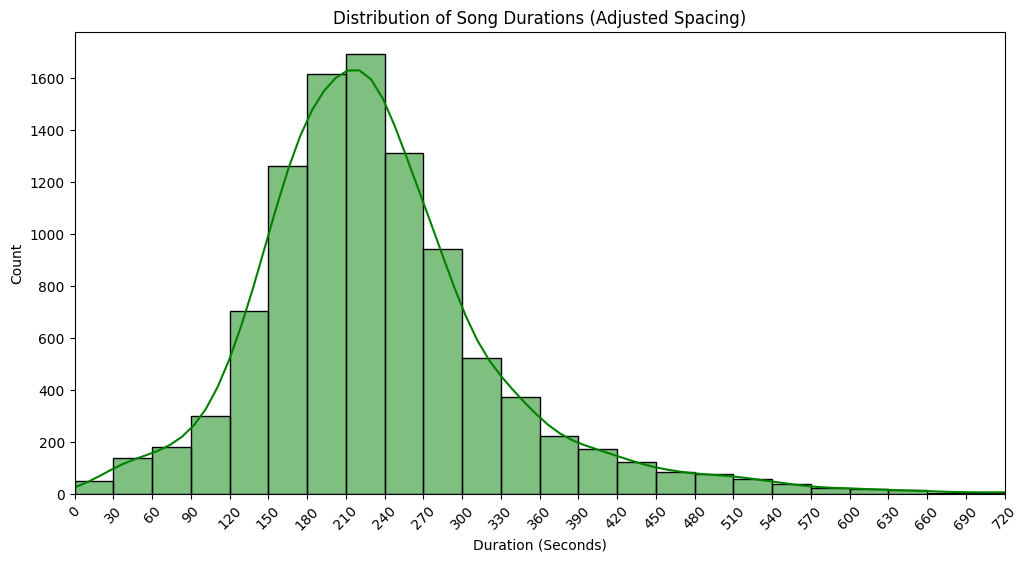

In [68]:
plt.figure(figsize=(12, 6))

# Define bins for better spacing (every 30 seconds up to the max duration)
bins = np.arange(0, df_msd["duration"].max() + 30, 30)
sns.histplot(df_msd["duration"], bins=bins, kde=True, color="green")

# Increase spacing on x-axis by setting custom limits
plt.xlim(0, 330) 

# Set major xticks at 30-second intervals
plt.xticks(np.arange(0, 750, 30), rotation=45)

plt.title("Distribution of Song Durations (Adjusted Spacing)")
plt.xlabel("Duration (Seconds)")
plt.ylabel("Count")

plt.show()


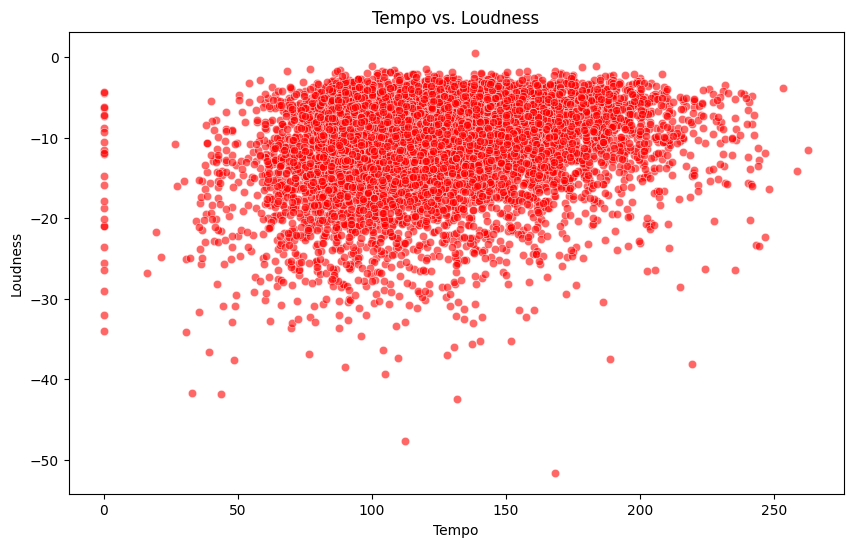

In [76]:
# Observe the correlation btw. tempo & loudness

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_msd['tempo'], y=df_msd['loudness'], alpha=0.6, color="red")
plt.title('Tempo vs. Loudness')
plt.xlabel('Tempo')
plt.ylabel('Loudness')
plt.show()